# Objektsorientering  

## Inheritance

In [2]:
class Square: 

    def __init__(self, side):
        self._side = side

    @property
    def side(self, value):
        return self._side

    @property
    def area(self):
        return self._side ** 2

    
class Rectangle:

    def __init__(self, long, short):
        self._long = long
        self._short = short
    
    @property
    def area(self):
        return self._long * self._short

s = Square(2)
r = Rectangle(2, 4)

s.area, r.area

(4, 8)

In [5]:
from abc import ABC, abstractmethod

class Shape(ABC):

    @abstractmethod
    def area(self):
        pass


class Square: 

    def __init__(self, side):
        self._side = side

    @property
    def side(self, value):
        return self._side

    @property
    def area(self):
        return self._side ** 2

    
class Rectangle(Shape):

    def __init__(self, long, short):
        self._long = long
        self._short = short
    
    @property
    def area(self):
        return self._long * self._short

s = Square(2)
r = Rectangle(2, 4)
shape = Shape()
s.area

TypeError: Can't instantiate abstract class Shape with abstract method area

När vi använder abstrakta metoder i Python är det bara en decorator (inte abstrakt) som säger att vi inte får instansiera det. 

In [11]:
class Person:
    def __init__(self, name):
        self._name = name


class Student(Person):
    @property
    def is_studying(self):
        print(f"{self._name} is studying")
        return True


class Unemployed(Student):
    @property
    def is_studying(self):
        print(f"{self._name} is not studying")
        return False

    @property
    def is_working(self):
        print(f"{self._name} is not unemployed")
        return False


u = Unemployed("Ada")
s = Student("Einstein")
p = Person("Church")

s._name, u._name, p._name

('Einstein', 'Ada', 'Church')

En god rekommendation är att inte ärva från flera klasser. 

In [12]:
class WithMessage(object):
    def __init__(self, message):
        self.message = message
    
    def __enter__(self):
        print(f"Entering with message {self.message}")
        return self.message
    
    def __exit__(self, *args):
        print("Exiting with message")


with WithMessage("Hello") as msg:           # msg namnger det som returneras från __enter__
    print(msg)



Entering with message Hello
Hello
Exiting with message


Vector(6.0, 9.0) Vector(2.0, 1.0) Vector(12.0, 15.0)
1
4.47213595499958
5.0
True


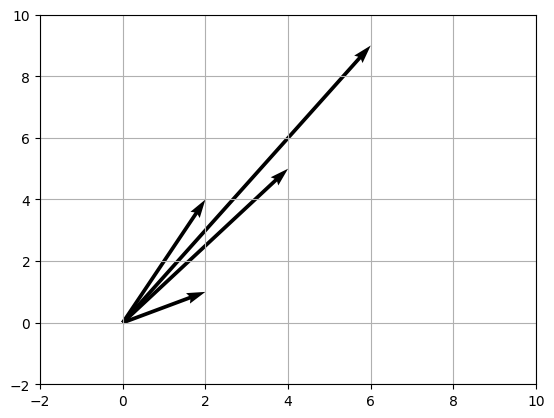

In [47]:
import matplotlib.pyplot as plt


class Vector:           # vector är som matematiska listor
    """A class to represent Euclidean vectors"""

    def __init__(self, *numbers):         # *numbers är som en dict med alla följande parametrar i
        # error checking
        for number in numbers:
            if not isinstance(number, (float, int)):
                raise TypeError(f"{number} is not a valid number")
        if len(numbers) <= 0:
            raise ValueError("Vectors can't be empty")
        
        self._numbers = tuple(float(number) for number in numbers)

    @property
    def numbers(self):
        return self._numbers
    
    @staticmethod
    def validate2d(instance):
        if not len(instance) == 2:
            raise ValueError("The vector is not 2D")
        return True
    
    def __add__(self, other):
        if self.validate_vector(other):
            numbers = (a + b for a, b in zip(self.numbers, other.numbers))
            return Vector(*numbers)
        
    def __sub__(self, other):
        if self.validate_vector(other):
            numbers = (a - b for a, b in zip(self.numbers, other.numbers))
            return Vector(*numbers)
    
    def __mul__(self, value):                       # här kan vi bara multiplicera t ex u * 3
        if not isinstance(value, (int, float)):
            raise TypeError("Value must be a scalar (int or float).")
        numbers = (a * value for a in self.numbers)
        return Vector(*numbers)
    
    def __rmul__(self, value):                      # detta gör vi för att kunna multiplicera t ex 3 * u
        return self * value

    def __len__(self):
        return len(self.numbers)

    def validate_vector(self, other):
        if not isinstance(other, Vector) or len(self.numbers) != len(other.numbers):
            raise ValueError(f"{other} is not a Vector")
        return True
    
    def __abs__(self):
        """Returns the Euclidean norm of the vector, aka the L2-norm"""   # kallas även manhattan distance ??? enligt Raphael
        return sum(a ** 2 for a in self.numbers) ** 0.5                   # ** 0.5 är samma sak som att ta kvadratroten ur

    def __repr__(self):
        return f"Vector{self.numbers}"
    
    def __getitem__(self, index):
        return self.numbers[index]
    
    @staticmethod
    def plot(*vectors):
        X, Y = [], []
        for v in vectors:
            if Vector.validate2d(v):
                X.append(v[0])
                Y.append(v[1])
        
        originX = originY = tuple(0 for _ in range(len(X)))
        plt.quiver(originX, originY, X, Y, angles = "xy", scale_units = "xy", scale = 1)
        plt.xlim(-2, 10)
        plt.ylim(-2, 10)
        plt.grid()
        plt.show()


v = Vector(2, 4)
u = Vector(4, 5)
print(u + v, u - v, u * 3)         # när det står + så kallar den på __add__, u blir self och v blir other

# multiplikation är kommutativt (spelar ingen roll vilket objekt som står till höger eller vänster) men multiplikation med en vektor/scalar (?) är inte det

abs(-1)         # abs är en inbyggd funktion som returnerar absolutbeloppet av ett tal
print(abs(-1))

# inom matematik skriver vi absolutbelopp som |n|
# |n| = n if n > 0
# |n| = -n if n < 0       (det är alltså minus minus n, alltså positivt därefter)
# | x - a |               alla punkter vars avstånd till a är x. den hanterar både positiva och negativa tal
# absolutbelopp på vector är hur lång den är, Euclidiskt avstånd

print(abs(v))
print(u[1])
print(Vector.validate2d(u))
Vector.plot(v, u, u+v, u-v)

En viktig sak med linjär algebra:
- ta norm
- ta magnitudvärde
det betyder avståndet från origo